In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

Data source can be used with the proper license from the following website: www.kaggle.com/c/titanic

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
print(f'Train data shape: {train_df.shape}')
print(f'Test data shape: {test_df.shape}')

Train data shape: (891, 12)
Test data shape: (418, 11)


In [5]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Training set is missing values in the Cabin column, the Age column, and the Embarked column.


In [6]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Mean values will be used for the missing values in the Age column

In [8]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

Mode values will be used for the missing values in the Embarked column

In [9]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [10]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [11]:
train_df['PassengerId'].duplicated().value_counts() # No duplicates are found in the PassengerId column

False    891
Name: PassengerId, dtype: int64

In [12]:
train_df[:891].corrwith(train_df['Survived']).sort_values(ascending=False).head(10)
train_df[:891].corrwith(train_df['Survived']).sort_values(ascending=False).head(10)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
dtype: float64

## Visualizations of the data

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

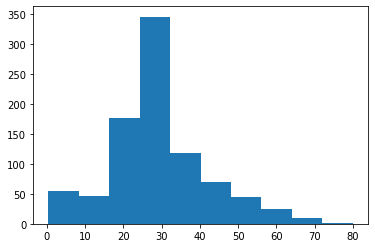

In [13]:
ages = train_df['Age']
plt.hist(ages)

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

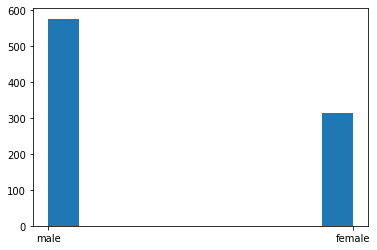

In [14]:
sex = train_df['Sex']
plt.hist(sex)

          Survived    Pclass       Age     SibSp      Fare     Parch
Survived  1.000000 -0.338481 -0.069809 -0.035322  0.257307  0.081629
Pclass   -0.338481  1.000000 -0.331339  0.083081 -0.549500  0.018443
Age      -0.069809 -0.331339  1.000000 -0.232625  0.091566 -0.179191
SibSp    -0.035322  0.083081 -0.232625  1.000000  0.159651  0.414838
Fare      0.257307 -0.549500  0.091566  0.159651  1.000000  0.216225
Parch     0.081629  0.018443 -0.179191  0.414838  0.216225  1.000000


<AxesSubplot:>

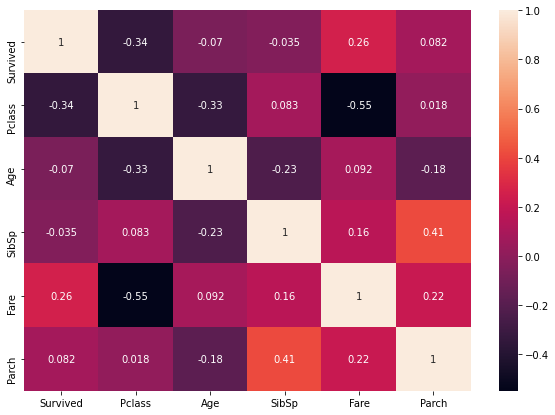

In [15]:
corr_arr = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Parch']].corr()
print(corr_arr)
plt.figure(figsize=(10,7))
sns.heatmap(corr_arr,annot=True)

#### Sex and Embarked columns are one hot encoded:

train_df.head(5)

In [16]:
# get_dummies method selected instead of mapping manual method.
train_df = pd.get_dummies(train_df, columns = ['Sex'])
test_df = pd.get_dummies(test_df, columns=['Sex'])
train_df = pd.get_dummies(train_df, columns = ['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])

New column creation with Family size

In [17]:
train_df['FamSize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamSize'] = test_df['SibSp'] + test_df['Parch']

In [18]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0


In [19]:
X = train_df.drop(columns=['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'])
X_sub = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin']).copy()
y = train_df['Survived']

In [20]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=11)

Model Section

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()   #(**rfc_params)
rf.fit(X_train, y_train)

rfpred = rf.predict(X_test)

rfscore = accuracy_score(y_test , rfpred)
print('Accuracy Score = ' , rfscore)

Accuracy Score =  0.8026905829596412


In [22]:
svc3 = SVC(kernel='poly' , degree=1)
svc3.fit(X_train , y_train)

pred3 = svc3.predict(X_test)

score3 = accuracy_score(y_test , pred3)

print('Accuracy Score = ' , score3)

Accuracy Score =  0.7354260089686099


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(learning_rate=0.09,max_depth=2,random_state=42)
gradient_boosting_model.fit(X_train , y_train)
pred3 = gradient_boosting_model.predict(X_test)
score3 = accuracy_score(y_test , pred3)
print('Accuracy Score = ' , score3)

Accuracy Score =  0.8609865470852018


In [24]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate=0.09,max_depth=2,random_state=1, use_label_encoder=False)
xgb_model.fit(X_train, y_train)
pred4 = xgb_model.predict(X_test)
score4 = accuracy_score(y_test , pred4)
print('Accuracy Score = ' , score4)

[23:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score =  0.8565022421524664


In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(learning_rate=0.09, random_state=42)
ada_model.fit(X_train, y_train)
pred4 = ada_model.predict(X_test)
score4 = accuracy_score(y_test , pred4)
print('Accuracy Score = ' , score4)


Accuracy Score =  0.8654708520179372


Accuracy Score =  0.8295964125560538
Training accuracy 0.9476
Testing accuracy 0.8296


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

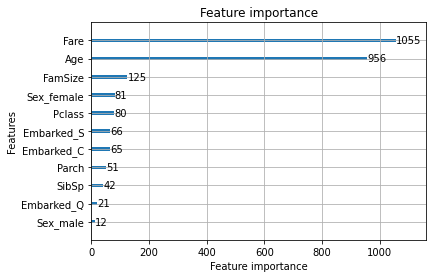

In [26]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

lgbm_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(X_train, y_train)
pred4 = lgbm_model.predict(X_test)
score4 = accuracy_score(y_test , pred4)
print('Accuracy Score = ' , score4)


print('Training accuracy {:.4f}'.format(lgbm_model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgbm_model.score(X_test,y_test)))
lgb.plot_importance(lgbm_model)

<AxesSubplot:>

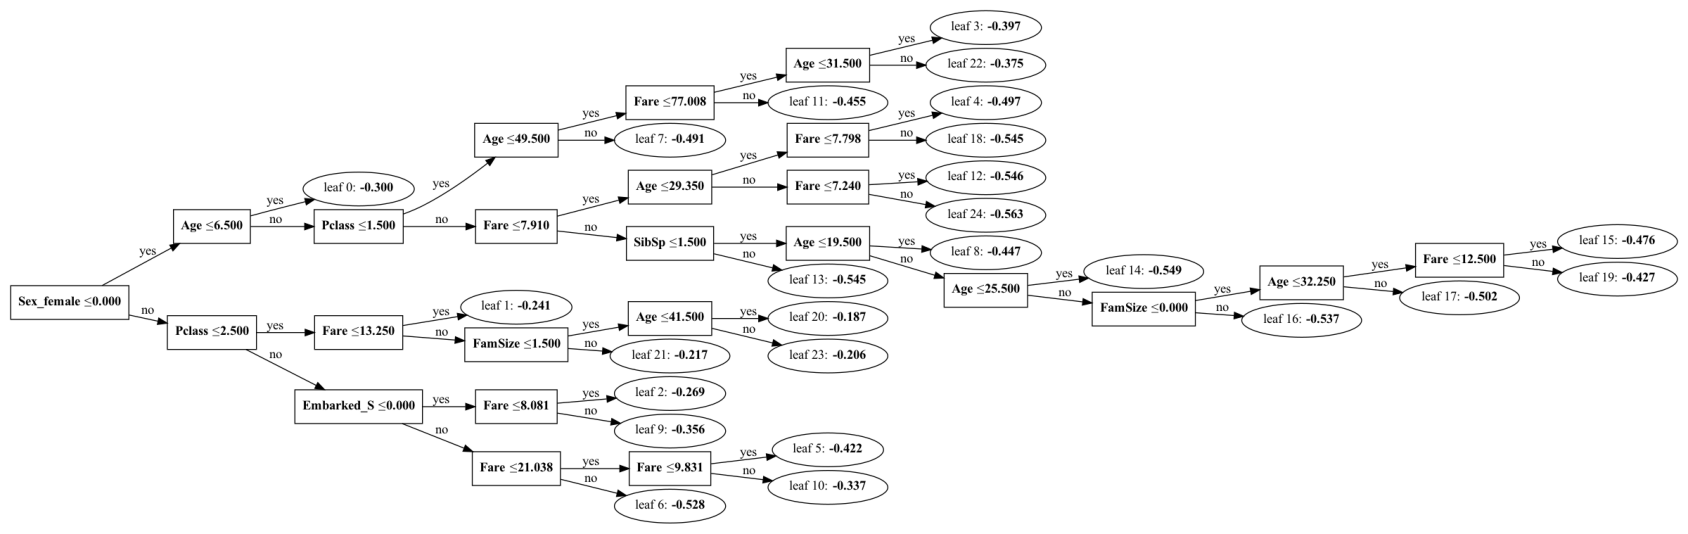

In [27]:
lgb.plot_tree(lgbm_model,figsize=(30,40))

In [46]:
### With perceptron:

In [28]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

65.92

Submission results for the Kaggle competition

In [29]:
test_df

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamSize
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,1,0,0,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,0,1,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,0,1,0,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,1,0,1,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,0,0,1,0
416,1308,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,0,1,0,0,1,0


In [30]:
gender_submission = pd.read_csv('data/gender_submission.csv')

In [31]:
X_test = pd.read_csv('data/test.csv')

In [32]:
X_sub.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
FamSize       0
dtype: int64

In [33]:
Y_pred = perceptron.predict(X_sub)

In [34]:
sub = gender_submission
sub['Survived'] = list(map(int, Y_pred))
sub.to_csv("submission2.csv", index=False)